In [ ]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

In [2]:
%matplotlib inline
import numpy as np
import scipy.linalg as sl
# we'll start using sparse matrices here
import scipy.sparse as sp
# and linear algebra functions designed for sparse matrices
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from pprint import pprint
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation

# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

Bad value in file '/home/jea4117/.config/matplotlib/matplotlibrc', line 1 ('backend: wkAgg'): Key backend: 'wkagg' is not a valid value for backend; supported values are ['GTK3Agg', 'GTK3Cairo', 'GTK4Agg', 'GTK4Cairo', 'MacOSX', 'nbAgg', 'QtAgg', 'QtCairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']


ModuleNotFoundError: No module named 'mpltools'

# Dimensions and Dimensional Analysis  <a class="tocSkip">

## PDE solvers (an introduction to finite differences and the FDM) <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Differentiation-(or-taking-a-derivative)---the-continuous-definition" data-toc-modified-id="Differentiation-(or-taking-a-derivative)---the-continuous-definition-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Differentiation (or taking a derivative) - the continuous definition</a></span></li><li><span><a href="#Finite-differences" data-toc-modified-id="Finite-differences-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Finite differences</a></span><ul class="toc-item"><li><span><a href="#The-forward-difference" data-toc-modified-id="The-forward-difference-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The forward difference</a></span></li><li><span><a href="#Taylor-series-to-estimate-accuracy" data-toc-modified-id="Taylor-series-to-estimate-accuracy-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Taylor series to estimate accuracy</a></span><ul class="toc-item"><li><span><a href="#Taylor-series-example-[from-previous-lecture]" data-toc-modified-id="Taylor-series-example-[from-previous-lecture]-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Taylor series example [from previous lecture]</a></span></li><li><span><a href="#Order-of-convergence---higher-generally-better" data-toc-modified-id="Order-of-convergence---higher-generally-better-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Order of convergence - higher generally better</a></span></li></ul></li><li><span><a href="#The-backward-difference" data-toc-modified-id="The-backward-difference-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>The backward difference</a></span></li><li><span><a href="#The-central-difference" data-toc-modified-id="The-central-difference-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>The central difference</a></span></li><li><span><a href="#Example:-Write-a-function-to-perform-numerical-differentiation" data-toc-modified-id="Example:-Write-a-function-to-perform-numerical-differentiation-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Example: Write a function to perform numerical differentiation</a></span></li><li><span><a href="#Example:-Compute-the-derivative-of-$\sin(x)$" data-toc-modified-id="Example:-Compute-the-derivative-of-$\sin(x)$-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Example: Compute the derivative of $\sin(x)$</a></span></li><li><span><a href="#How-small-(or-large)-can-$\Delta-x$-go?" data-toc-modified-id="How-small-(or-large)-can-$\Delta-x$-go?-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>How small (or large) can $\Delta x$ go?</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-2.7.1"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Approximating-second-derivatives" data-toc-modified-id="Approximating-second-derivatives-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Approximating second derivatives</a></span></li></ul></li><li><span><a href="#Introduction-to-BVPs" data-toc-modified-id="Introduction-to-BVPs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Introduction to BVPs</a></span><ul class="toc-item"><li><span><a href="#Problem-non-dimensionalisation" data-toc-modified-id="Problem-non-dimensionalisation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Problem non-dimensionalisation</a></span></li><li><span><a href="#Model-problem---BVP:-steady-state-advection-diffusion" data-toc-modified-id="Model-problem---BVP:-steady-state-advection-diffusion-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Model problem - BVP: steady-state advection-diffusion</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Methods-for-solving-BVPs" data-toc-modified-id="Methods-for-solving-BVPs-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Methods for solving BVPs</a></span></li><li><span><a href="#Defining-a-grid-(or-mesh)" data-toc-modified-id="Defining-a-grid-(or-mesh)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Defining a grid (or mesh)</a></span></li><li><span><a href="#Dealing-with-Dirichlet-boundary-conditions" data-toc-modified-id="Dealing-with-Dirichlet-boundary-conditions-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Dealing with Dirichlet boundary conditions</a></span></li><li><span><a href="#Solving-the-diffusion-equation" data-toc-modified-id="Solving-the-diffusion-equation-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Solving the diffusion equation</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Observations</a></span></li></ul></li></ul></li><li><span><a href="#The-time-independent-(steady)-advection-diffusion-problem" data-toc-modified-id="The-time-independent-(steady)-advection-diffusion-problem-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The time-independent (steady) advection-diffusion problem</a></span><ul class="toc-item"><li><span><a href="#Discretisation-choices-for-advection-and-diffusion" data-toc-modified-id="Discretisation-choices-for-advection-and-diffusion-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Discretisation choices for advection and diffusion</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Observations</a></span></li><li><span><a href="#More-observations" data-toc-modified-id="More-observations-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>More observations</a></span></li></ul></li><li><span><a href="#Upwind-for-advection" data-toc-modified-id="Upwind-for-advection-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Upwind for advection</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Analysis-of-the-upwind-scheme-[$\star$]" data-toc-modified-id="Analysis-of-the-upwind-scheme-[$\star$]-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Analysis of the upwind scheme [$\star$]</a></span></li><li><span><a href="#Practicalities!" data-toc-modified-id="Practicalities!-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Practicalities!</a></span></li></ul></li><li><span><a href="#The-time-dependent-(unsteady)-advection-diffusion-problem" data-toc-modified-id="The-time-dependent-(unsteady)-advection-diffusion-problem-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>The time-dependent (unsteady) advection-diffusion problem</a></span><ul class="toc-item"><li><span><a href="#The-equation-in-higher-spatial-dimensions-[$\star$]" data-toc-modified-id="The-equation-in-higher-spatial-dimensions-[$\star$]-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>The equation in higher spatial dimensions [$\star$]</a></span></li><li><span><a href="#Non-dimensionalisation" data-toc-modified-id="Non-dimensionalisation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Non-dimensionalisation</a></span></li><li><span><a href="#The-Method-of-Lines" data-toc-modified-id="The-Method-of-Lines-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>The Method of Lines</a></span><ul class="toc-item"><li><span><a href="#Defining-a-spatial-grid" data-toc-modified-id="Defining-a-spatial-grid-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Defining a spatial grid</a></span></li></ul></li><li><span><a href="#Discretising-in-space" data-toc-modified-id="Discretising-in-space-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Discretising in space</a></span><ul class="toc-item"><li><span><a href="#Including-Dirichlet-boundary-conditions" data-toc-modified-id="Including-Dirichlet-boundary-conditions-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Including Dirichlet boundary conditions</a></span></li><li><span><a href="#The-initial-condition" data-toc-modified-id="The-initial-condition-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>The initial condition</a></span></li><li><span><a href="#The-(semi-)-discretised-system" data-toc-modified-id="The-(semi-)-discretised-system-5.4.3"><span class="toc-item-num">5.4.3&nbsp;&nbsp;</span>The (semi-) discretised system</a></span></li></ul></li><li><span><a href="#The-semi-disrete-matrix-system" data-toc-modified-id="The-semi-disrete-matrix-system-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>The semi-disrete matrix system</a></span></li><li><span><a href="#Discretising-in-time" data-toc-modified-id="Discretising-in-time-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Discretising in time</a></span><ul class="toc-item"><li><span><a href="#Forward-Euler" data-toc-modified-id="Forward-Euler-5.6.1"><span class="toc-item-num">5.6.1&nbsp;&nbsp;</span>Forward Euler</a></span></li><li><span><a href="#Observations" data-toc-modified-id="Observations-5.6.2"><span class="toc-item-num">5.6.2&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Example---advection-diffusion-of-a-Gaussian" data-toc-modified-id="Example---advection-diffusion-of-a-Gaussian-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Example - advection-diffusion of a Gaussian</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-5.7.1"><span class="toc-item-num">5.7.1&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Periodic-boundaries" data-toc-modified-id="Periodic-boundaries-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Periodic boundaries</a></span><ul class="toc-item"><li><span><a href="#Comments" data-toc-modified-id="Comments-5.8.1"><span class="toc-item-num">5.8.1&nbsp;&nbsp;</span>Comments</a></span></li></ul></li></ul></li><li><span><a href="#Stability-considerations-(a-summary)" data-toc-modified-id="Stability-considerations-(a-summary)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Stability considerations (a summary)</a></span><ul class="toc-item"><li><span><a href="#Cell-Peclet-number" data-toc-modified-id="Cell-Peclet-number-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Cell Peclet number</a></span></li><li><span><a href="#The-Courant-number-and-the-CFL-condition" data-toc-modified-id="The-Courant-number-and-the-CFL-condition-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>The Courant number and the CFL condition</a></span></li><li><span><a href="#The-CFL-condition---a-physical-interpretation-[$\star$]" data-toc-modified-id="The-CFL-condition---a-physical-interpretation-[$\star$]-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>The CFL condition - a physical interpretation [$\star$]</a></span></li><li><span><a href="#The-r-number/parameter-for-diffusion" data-toc-modified-id="The-r-number/parameter-for-diffusion-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>The r-number/parameter for diffusion</a></span></li><li><span><a href="#Other-time-stepping-options" data-toc-modified-id="Other-time-stepping-options-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Other time stepping options</a></span></li></ul></li><li><span><a href="#Final-comments" data-toc-modified-id="Final-comments-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Final comments</a></span></li></ul></div>

# Learning objectives: <a class="tocSkip">


* Learn how to non-dimensionalise variables and equations
* Understand how to solve the advection-diffusion equation
  * Numerical and analytical solutions
* Learn how to carry out a dimensional analysis using the Buckingham-
Pi theory
* Learn how to apply dimensional analysis to stability problems


# Advection-Diffusion Equation

We need an equation to demonstrate dimensional analysis on and the advection-diffusion equation is a good one to start with:

Consider a fluid with a chemical dissolved in it. The chemical will move with the fluid, but will also spread out due to diffusion
* This is the classical example of advection-diffusion, but the equation appears in many other contexts as well
* Even the Navier-Stokes equation has an advection-diffusion component at its heart, though for momentum rather than a substance (viscosity results in the diffusion of momentum):

$$ \mathbf{f} = \mathbf{v}C - D \nabla C \qquad \text{equation for the flux} $$

$$ \frac{\partial C}{\partial t} = -\nabla \cdot \mathbf{f} \qquad \text{continuity equation} $$ 

If we substitute the flux equation into the continuity equation we get the following equation (assuming that the diffusion coefficient is constant):

$$ \frac{\partial C}{\partial t} = -C \nabla \cdot \mathbf{v} - \mathbf{v} \cdot \nabla C + D \nabla^2C $$

If the fluid volume is conserved (i.e. $ \nabla \cdot \mathbf{v} = 0 $) then we arrive at the more familiar form of the advection-diffusion equation:

$$ \frac{\partial C}{\partial t} = - \mathbf{v} \cdot \nabla C + D \nabla^2C $$


## Advection-Diffusion in 1D

$$ \frac{\partial C}{\partial t} = -v \frac{\partial C}{\partial x} + D \frac{\partial^2 C}{\partial x^2} $$


* $ \text{1}^{\text{st}} $ derivative is the term associated with the motion of the chemical due to the movement of the liquid (advection)
  * Because of this $ \text{1}^{\text{st}} $ order terms are often referred to as “advective” even if the underlying physical mechanism isn’t advection
 

* $ \text{2}^{\text{nd}} $ derivative is the term associated with the diffusion of the chemical
  * Similarly to above, $ \text{2}^{\text{nd}} $ order terms are often referred to as “diffusive” even if the underlying mechanism isn’t diffusion

## Example: Transport and Diffusion across a membrane

Let's consider a membrane through which a fluid is being passed:
* The fluid has a superficial velocity v and the chemical has a diffusivity, D
* Within the fluid is a chemical that has a concentration C 0 on the upstream side
* On the downstream side of the membrane it rapidly reacts and can be assumed to have a concentration of zero
* The membrane has a thickness of h

At first glance it appears that there are 4 different things that you can adjust in this problem:
* C 0 , h, D and v
* How many of these things are actually independent?
* Are there combinations of things that we can change without changing the form of the solution?

## Non-dimensionalising the equation

This is a useful way of finding the number of actual parameters in a problem
* Also allows the underlying dependencies to be determined in a way that is independent of, for instance, the scale of the system

Start by introducing dimensionless versions of the dependent and independent variables
* Concentration and distance have obvious ways of being made dimensionless:

$$ C^* = \frac{C}{C_0} \qquad \qquad x^* = \frac{x}{h} $$

With time there are two options:
* This is because there is no variable that only has units of time and it is found in two different variables
* We can choose either an advection time scale or a diffusion time scale

$$ t^* = \frac{vt}{h} \qquad \qquad t^* = \frac{Dt}{h^2} $$

***note that there isn’t a “correct” choice, with the appropriate one depending on the system and personal preference***

## Non-dimensionalising the equation

Substituting for the dimensional variables and rearranging the equation leads to the following expression (using the diffusive time scale):

$$ \frac{\partial C^*}{\partial t^*} = -\frac{vh}{D} \frac{\partial C^*}{\partial x^*} + \frac{\partial^2 C^*}{\partial {x^*}^2}, \qquad \text{with} \qquad C^* = \frac{C}{C_0}, \quad  x^* = \frac{x}{h}, \quad t^* = \frac{Dt}{h^2} $$

Note that the dimensionless solution only depends on one dimensionless parameter – the Peclet number

$$ Pe = \frac{vh}{D} $$

### What does the Peclet number represent?

$$ Pe = \frac{vh}{D} $$

As with most dimensionless groups, the Peclet number is a ratio of two effects

* The Peclet number represents the relative importance of advection compared to diffusion

  * At low Peclet numbers ($Pe \ll1$) diffusion dominates
  * At high Peclet numbers ($Pe\gg 1$) advection dominates

### Numerical Solution

Explicit numerical solution for this equation based on finite differencing is relatively straight forward to implement
*More on this in ACSE-3*

\begin{align*}
\frac{\partial C^*}{\partial t^*} & \approx \frac{C(x^*, t^* + \Delta t^*)-C(x^*, t^*)}{\Delta t^*}\\[10pt]
\frac{\partial C^*}{\partial x^*} & \approx \frac{C(x^* + \Delta x^*, t^*)-C(x^* - \Delta x^*, t^*)}{2 \Delta x^*}\\[10pt]
\frac{\partial^2 C^*}{\partial {x^*}^2} & \approx \frac{C(x^* + \Delta x^*, t^*)-C(x^* - \Delta x^*, t^*) - 2C(x^*, t^*)}{\Delta {x^*}^2}
\end{align*}

### Numerical Solution

The governing equation

$$ \frac{\partial C^*}{\partial t^*} = -Pe \frac{\partial C^*}{\partial x^*} + \frac{\partial^2 C^*}{\partial {x^*}^2} $$

... can be approximated as

$$ C^*_{i,j+1} \approx C^*_{i,j} + \Delta t^* \Bigg( \frac{-Pe \big(C^*_{i+1,j} - C^*_{i-1,j}\big)}{2\Delta x^*} + \frac{\big(C^*_{i+1,j} + C^*_{i-1,j} - 2C^*_{i,j}\big)}{\Delta {x^*}^2} \Bigg) $$

For stability in this explicit scheme:

*Again more on why this is the case in ACSE-3*

$$ \Delta t^* \ll \text{min}\Bigg( \frac{\Delta x^*}{Pe}, \frac{\Delta {x^*}^2}{2} \Bigg) $$

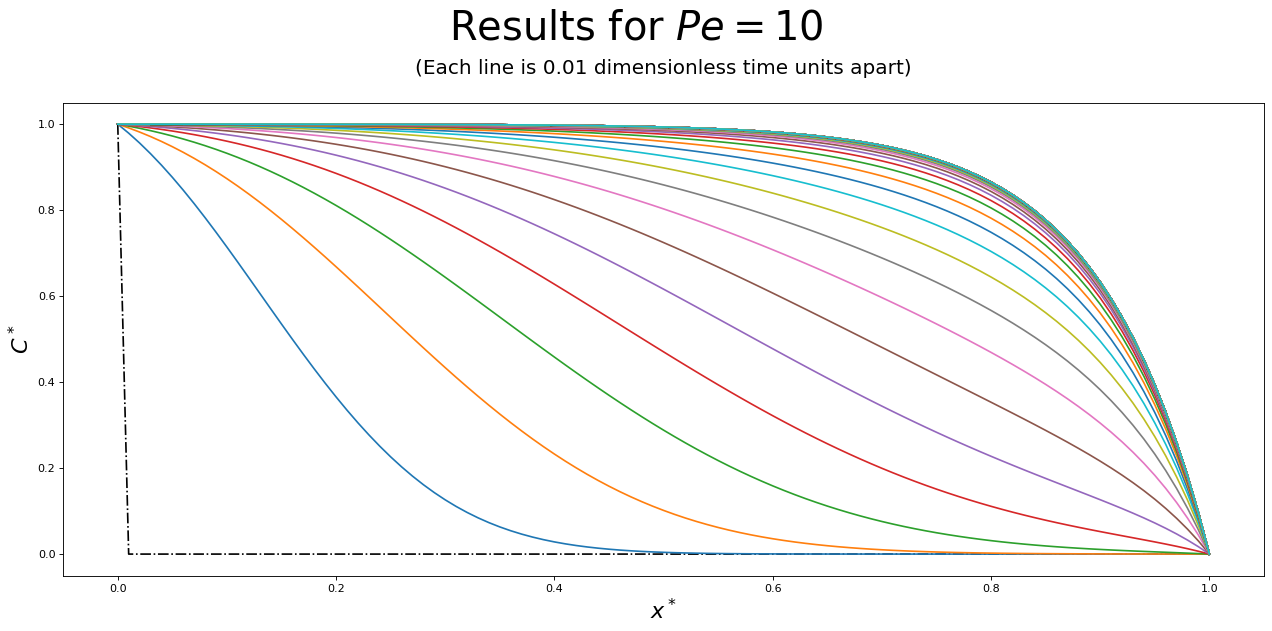

In [18]:
def advection_diffusion(t, t_out, C_old, C_new):
    # continue until the maximum time is exceded
    while (t < t_max):
        # explicitely set new concentration based on old concentration
        for i in range(1, i_max-1, 1):
            C_new[i] = dt*((1.0/(dx**2))*(C_old[i+1]+C_old[i-1]-2.0 *
                           C_old[i])-(Pe/(2.*dx))*(C_old[i+1]-C_old[i-1]))+C_old[i]

        t += dt

        # plot a line at the specified time interval
        if (t >= t_out):
            plt.plot(x, C_new)
            t_out += dt_out

        # swap the old and the new arrays of concentration values
        Ctemp = C_old
        C_old = C_new
        C_new = Ctemp

    return


# set the 1D domain
L = 1.0  # length of the domain
i_max = 101  # number of discrete points
x = np.linspace(0, L, i_max)  # discretised domain
dx = L/(i_max-1)  # sice of discrete element

# set intial condition as zero concentration
C_old = np.zeros(i_max)
C_new = np.zeros(i_max)

# set Peclet number
Pe = 10.0

# Time step set based on stability criterion:
# advective stability criterion
dt = dx/(Pe)
# include diffusive criterion
dt = 0.2*min(dt, 0.5*(dx**2))

# set inlet concentration
C_new[0] = 1.0
C_old[0] = 1.0

t = 0.0
t_out = 0.0
dt_out = 0.01

if (dt > dt_out):
    dt = dt_out

# run for 10 non-dimensional time steps
t_max = 1.0

plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel(r'$x^*$', fontsize=20)
plt.ylabel(r'$C^*$', fontsize=20)
plt.suptitle(r'Results for $Pe = %g$' %Pe, fontsize=36)
plt.title('(Each line is %g dimensionless time units apart)\n' %dt_out, fontsize=18)

# plot the initial condition and move one time step forward
plt.plot(x, C_old, 'k-.')
t_out += dt_out
# solve the approximated form of the equation (and plot the solution at each time step)
advection_diffusion(t, t_out, C_old, C_new)

plt.show()

### Exercise
* How does changing the Peclet number change the shape of the solution?
* Note that it also changes the time taken to run the simulation
  * Explicit solvers have strict time step constraints that change with both the resolution used and the physical parameters

## Analytical Solutions

It is straight forward to get an analytical solution to this equation if we assume steady-state

* The behaviour that is approached as time tends to infinity
* The PDE becomes an ODE

$$ \frac{d^2 C^*}{d {x^*}^2} = Pe \frac{d C^*}{d x^*}$$

Since $C^*$ is $1$ at $x^*= 0$ and $C^*$ is $0$ at $x^*= 0$ the following expression can be obtained (simple calculus, but quite a bit of algebra!):

$$ C^* = \frac{e^{Pe} - e^{Pe x^*}}{e^{Pe} - 1}$$

### Exercise

Show for yourself that that the solution to

$$ \frac{d^2 C^*}{d {x^*}^2} = Pe \frac{d C^*}{d x^*}$$

is 

$$ C^* = \frac{e^{Pe} - e^{Pe x^*}}{e^{Pe} - 1}$$

assuming that $C^*$ is $1$ at $x^*= 0$ and $C^*$ is $0$ at $x^*= 0$

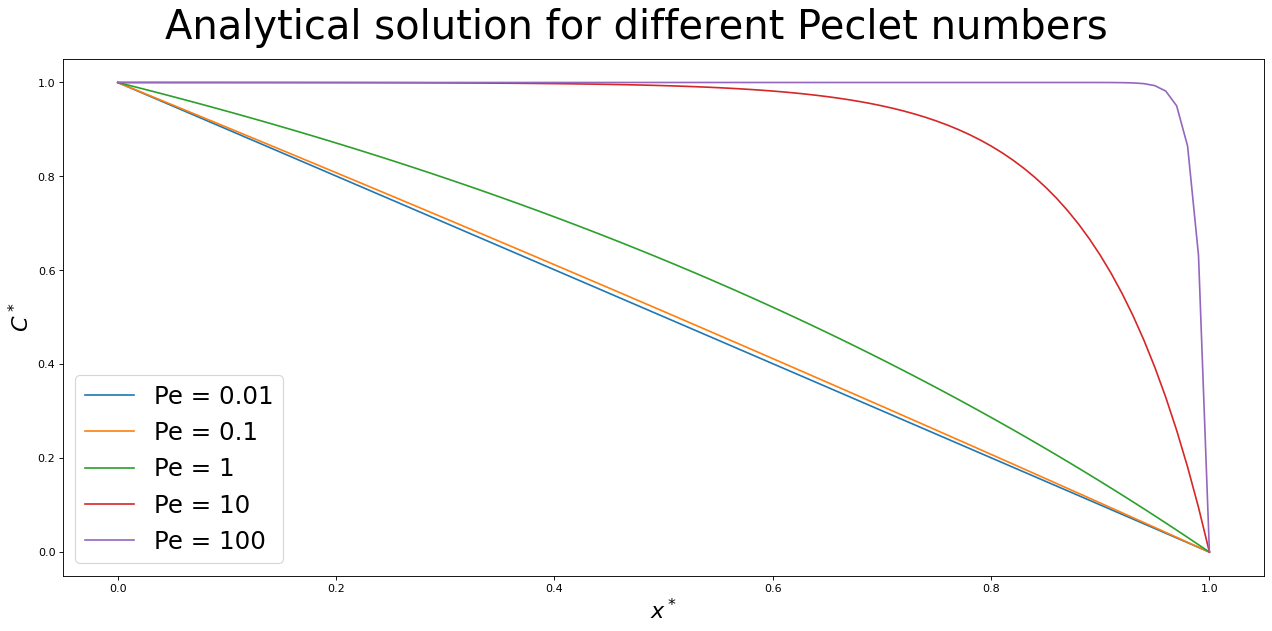

In [34]:
def advection_diffusion_analytical(Pe, x):
    
    return (np.exp(Pe) - np.exp(Pe*x))/(np.exp(Pe) - 1)


# set the 1D domain
L = 1.0  # length of the domain
i_max = 101  # number of discrete points
x = np.linspace(0, L, i_max)  # discretised domain
dx = L/(i_max-1)  # sice of discrete element

# set intial condition as zero concentration
C_old = np.zeros(i_max)
C_new = np.zeros(i_max)

# set 5 Peclet numbers from 1e-2 to 1e2 (log scale)
Pe = np.logspace(-2, 2, 5)

plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel(r'$x^*$', fontsize=20)
plt.ylabel(r'$C^*$', fontsize=20)
plt.suptitle(r'Analytical solution for different Peclet numbers', fontsize=36)

# solve and plot for each Peclet number
for Pe_i in Pe:
    solution = advection_diffusion_analytical(Pe_i, x)
    plt.plot(x, solution, label=r'Pe = %g' %Pe_i)

plt.legend(loc=3, fontsize=22)
plt.show()

## Dimensional Analysis

As you have seen, we can obtain the relevant dimensionless groups and dependencies by non-dimensionalising the governing equations

* This requires that we have a theory/model to describe the system

We can still work out the relevant dimensionless groups even if we don’t have a model for the system
* How many things do we need to vary to study the system?
* What are the dimensionless quantities that should be changed?

## Number of Parameters

The first question we can ask is how many parameters are required to describe the system? 

To do this we need to know how many variables are required to describe the system

* E.g. length scale, viscosity, density, velocity, diffusivity etc.

...as well as how many base dimensions these variables involve

* E.g. distance, time, mass etc.

**Because any resultant model must be dimensionally consistent, the number of dimensionless groups required to specify a system is equal to the number of variables minus the number of base dimensions**

## Note on Base Dimensions

To determine the base dimensions to use find the minimum number required for the variables in the system


* E.g. Energy, force and pressure can all be broken down into dimensions of mass, length and time in different proportions.


* You must not break down a dimension if breaking it down would introduce more dimensions than are eliminated

  * Might be the case if it appears in more than one variable and one or more of its internal dimensions does not appear in any other variables in the system

## How do we determine the dimensionless groups?
## Buckingham Pi Theory

The first thing to do is to identify the variables involved in a system and their associated dimensions

As an example I will use a fluid flowing down a pipe under the influence of gravity

* Relevant variables: Density (ρ), viscosity (μ), pipe diameter (d), velocity (v) and gravity (g)

* Dimensions: Length ($L$), mass ($M$) and time ($T$)



$$ \rho = \frac{M}{L^3} \qquad \mu = \frac{M}{LT} \qquad d = L \qquad v = \frac{L}{T} \qquad g={L}{T^2}$$


We can write this problem as a matrix of variables and their associated dimensions:

<img src="figures/BuckinghamPi.png" style="width: 400px">

We now need to find combinations of the variables that result in the total of each of the dimensions in the combination being zero (i.e. the combination is dimensionless)

* We already know that for this problem there can be two such independent combinations

* Mathematically this can be expressed as follows, where x is a vector containing the number of each of the variables that need to be combined and 0 is a zero vector:

$$ \mathbf{A} \mathbf{x} = 0$$

Because A is not square we can’t simply invert (and if it was square and invertible, the only solution would be the trivial one of a dimensionless group containing no variables!)

* For a small $\mathbf{A}$ we could quite easily find valid $\mathbf{x}$s by inspection

* The system is underspecified and so there are actually infinitely many solutions

* I will show a more rigorous way to achieve it

Let us split $\mathbf{A}$ into a square portion and a remaining portion:


$$ \mathbf{A} = 
\begin{pmatrix}
1 & 1 & 0 & 0 & 0\\
-3 & -1 & -1 & 1 & 1\\
0 & -1 & 0 & -1 & -2
\end{pmatrix} $$


$$ \mathbf{A}_1 = 
\begin{pmatrix}
1 & 1 & 0 \\
-3 & -1 & -1\\
0 & -1 & 0 
\end{pmatrix}
\qquad
\mathbf{A}_2 = 
\begin{pmatrix}
0 & 0\\
1 & 1\\
-1 & -2
\end{pmatrix} $$


We must similarly split $\mathbf{x}$:


$$ \mathbf{x} = 
\begin{pmatrix}
x_{\rho} \\
x_{\mu} \\
x_d \\
x_v \\
x_g
\end{pmatrix}
$$


$$ \mathbf{x}_1 = 
\begin{pmatrix}
x_{\rho} \\
x_{\mu} \\
x_d
\end{pmatrix}
\qquad
\mathbf{x}_2 = 
\begin{pmatrix}
x_v \\
x_g
\end{pmatrix}
$$

We can now express the problem as follows:

$$ \mathbf{A}_1 \mathbf{x}_1 = - \mathbf{A}_2 \mathbf{x}_2 $$

or in solvable form:

$$ \mathbf{x}_1 = -\mathbf{A}_1^{-1}\mathbf{A}_2 \mathbf{x}_2 $$


Note that if $\mathbf{A}_1$ is singular (i.e. there is no valid $\mathbf{A}_1^{-1}$ ) then you need to split the original $\mathbf{A}$ into a different $\mathbf{A}_1$ and $\mathbf{A}_2$

* Our choice of which variables are specified and which are calculated is essentially arbitrary

While there are only 2 independent dimensionless groups that can be produced for this problem, there is more than one way to achieve this

* Each set of values for $\mathbf{x}_2$ produces a different set of values for $\mathbf{x}_1$

* We can choose any two independent $\mathbf{x}_2$ vectors to form our dimensionless groups

The easiest thing to do ensure that the dimensionless groups are independent is to have a single variable specified for each vector

* Two independent dimensionless groups would result from having $(1, 0)$ and $(0, 1)$ as two vectors for $\mathbf{x}_2$

  * We know that they are independent because they each contain a variable that the other one does not contain


We can obtain the following inverse

$$\mathbf{A}_1^{-1} = 
\begin{pmatrix}
1 & 1 & 0 \\
-3 & -1 & -1\\
0 & -1 & 0 
\end{pmatrix}
$$

Using the equations from the previous slides this results in

$$ \mathbf{x} = 
\begin{pmatrix}
1 \\
-1 \\
1 \\
1 \\
0
\end{pmatrix}
\qquad
\text{and}
\qquad
\mathbf{x} = 
\begin{pmatrix}
2 \\
-2 \\
3 \\
0 \\
1
\end{pmatrix},
\qquad
\text{with}
\qquad
\mathbf{x} = 
\begin{pmatrix}
x_{\rho} \\
x_{\mu} \\
x_d \\
x_v \\
x_g
\end{pmatrix}
$$

Which represent the following two dimensionless groups:

$$ N_1 = \rho \mu^{-1} d v \qquad \text{and} \qquad N_2 = \rho^2 \mu^{-2} d^3 g$$

or

$$ N_1 = \frac{\rho d v}{\mu} \qquad \text{and} \qquad N_2 = \frac{\rho^2 d^3 g}{\mu^2}$$

### Reynolds Number


$$ Re = \frac{\rho d v}{\mu} $$

<br>

The Reynolds number is the most ubiquitous dimensionless group in fluid dynamics

* Much more on it in a later lecture

* Important use in predicting the onset of turbulence

* It represents a balance between inertial and viscous forces

<br>

$$
Re \propto \frac{\mathit{Inertial\ Force}}{\mathit{Viscous\ Force}} \propto \frac{\rho v \frac{dv}{dx}}{\mu \frac{d^2v}{dx^2}} \propto \frac{\rho v \frac{v}{d}}{\mu \frac{v}{d^2}} = \frac{\rho d v}{\mu}
$$

<br>

You should hopefully recognise the inertial and viscous terms from the Navier-Stokes equation

### Galileo Number


$$ Ga = \frac{\rho^2 g d^3}{\mu^2} $$

<br>

Represents the balance between the gravitational, inertial and viscous forces

* Will appear in problems with gravitationally driven flows

* It is proportional to the inertial force times the gravitational force divided by the viscous force squared

<br>

$$
Ga \propto \frac{\mathit{Inertial\ Force\ \times Gravity\ Force}}{\mathit{Viscous\ Force}^2} \propto \frac{\rho v \frac{dv}{dx} \rho \mathit{g}}{\bigg(\mu \frac{d^2v}{dx^2}\bigg)^2} \propto \frac{\rho v \frac{v}{d} \rho \mathit{g}}{\bigg(\mu \frac{v}{d^2}\bigg)^2} = \frac{\rho^2 \mathit{g} d^3}{\mu^2}
$$

<br>

You should hopefully recognise the inertial and viscous terms from the Navier-Stokes equation

### Other Dimensionless Combinations

Note that Buckingham Pi analysis allows you to identify how many dimensionless groups are required to specify the system and allows you to identify a set of suitable numbers

 ..., but these numbers are not unique and other valid combinations are possible

If the dimensionless groups found are $N_1, N_2, \ldots N_i$ then a new valid dimensionless can be created:

$$ N_{new} = N_1^{n1} N_2^{n2} \ldots N_i^{ni}  $$

The main restriction on doing this is that the new set of dimensionless numbers must contain all the same variables as the original set

* I.e. you must not use the above relationship to eliminate a variable from the set of dimensionless groups

### Our Problem

In our case, for instance we could divide the Galileo number by the Reynolds

* This results in a new dimensionless group that represents the ratio of the gravitational to the viscous force (if this dimensionless group has a name, I don’t know it!)

$$ Re = \frac{\rho d v}{\mu} \qquad N = \frac{\rho g d^2}{\mu v}$$

Alternatively we can get another set that both have names: Divide the Reynolds number squared by the Galileo number 

* This results in the Froude number – Ratio of inertial to gravity forces

$$ Re = \frac{\rho d v}{\mu} \qquad Fr = \frac{v^2}{g d}$$

## Choosing the Appropriate Numbers

* As all of these are valid combinations the appropriate ones to use are subjective, but should be based on an understanding of the system


* Use dimensionless groups that represent the main interactions in the system


* Often useful to try and keep the dimensionless groups associated with the main output variables in dimensionless groups of their own

  * This allows us to study the dimensionless outputs as functions of the dimensionless inputs

### Example

We wish to analyse a droplet of water emerging from a needle and, in particular, its average diameter, $d_d$ , when it detaches from a needle of diameter $d_n$

* Initially we can assume that the droplets are being formed slowly:
    
    We therefore only need to consider the variables associated with static shape:
  * Surface tension, $\gamma$
  * Gravity, $g$
  * Water density, $\rho$
  
  
* How many dimensionless groups are required to satisfy this system?
  * Derive suitable ones


* What additional variables may be required in a dynamic system?
  * What additional dimensionless groups may this require?

## Other Non-Dimensional Quantities

Dimensional analysis gives a method for determining appropriate combinations of dimensional quantities

Remember that any quantities that are already dimensionless need to also be included in any analysis

* Exponents


* Shape
  * For simple shapes there may be dimensionless groups made of dimensional variables that can specify the problem (e.g. aspect ratios)
  * More complex shapes may not be as simply quantified

## Instabilities

* Instabilities can be tricky to model

  * Inherently time dependent
  
  * Can be triggered by small fluctuations
    * Numerical errors may trigger instabilities more easily than they really occur
    * ... or models can be more stable than the real world and instabilities are not triggered
    
 
* Dimensional analysis useful for investigating and quantifying instabilities
  
  * Both the conditions for the onset and the subsequent behaviour


* An important instability is that associated with the transition from laminar to turbulent flow

  * Characterised by the Reynolds number
  * We will not be looking at this instability here as you will be doing more on this transition in the Fluid Mechanics lecture

### Rayleigh-Taylor Instability


* A dense fluid over a less dense one


* Inherently unstable unless there are interfacial effects


* Surface tension or diffusion can potentially stop the instability


* Density, gravity and viscosity can all impact the size of the instabilities and how fast they grows

### Dimensional Analysis - Rayleigh-Taylor


To reduce the size of our analysis lets assume that both fluids have the same kinematic viscosity, $\nu$

$$ \nu = \frac{\mu}{\rho} \quad \text{units: } {\text{m}^2}/{\text{s}} $$


* If the viscosities were different then the ratio of the viscosities could appear as one of the dimensionless groups


* There are two densities $\rho_h$ and $\rho_l$


* Gravity, $g$, is the other physical property of the system


We want to investigate two parameters:
* $\lambda$ is the wavelength of the instability

  * We could equivalently have used the wavenumber of the instability, which is proportional to the inverse of the wavelength


* $t$ is the timescale of the instability

  * E.g. how long the instability takes to grow to a given size

We have 6 variables $(\nu, g, \rho_h, \rho_l, \lambda \text{ and } t)$ and 3 dimensions $(M, L \text{ and } T)$


This implies that 3 dimensionless groups are required to define the system

* We want two of them to involve $\lambda$ and $t$ – keep what we want to predict separate

* There will then be a 3 rd independent one

We can solve using the $x$ associated with either $\rho_l$ , $\lambda$ or $t$ as one and the others zero for each of the variables


This will result in the following 3 dimensionless groups:

<br>

$$ \lambda^{*} = \frac{\lambda g^{1/3}}{\nu^{2/3}} \qquad t^* = \frac{t g^{2/3}}{\nu^{1/3}} \qquad N_{\rho} = \frac{\rho_h}{\rho_l} $$

<br>

For the density contrast it is actually more usual to use the Atwood number:

<br>

$$ A = \frac{\rho_h - \rho_l}{\rho_h + \rho_l} $$

<br>

... but this is just a function of the above dimensionless group anyway

<br>

$$ A = \frac{N_{\rho} - 1}{N_{\rho} + 1} $$


$$ \lambda^{*} = \frac{\lambda g^{1/3}}{\nu^{2/3}} \qquad t^* = \frac{t g^{2/3}}{\nu^{1/3}} \qquad A = \frac{\rho_h - \rho_l}{\rho_h + \rho_l} $$

<br>

Having done this analysis we can say, for instance, that the dimensionless wavelength of the instability at a given dimensionless time should be a function of the Atwood number only (assuming the same starting geometry)


This, of course, assumes that we were correct in our identification of the important variables in the system!


### Plateau-Rayleigh Instability


* Confusingly there are two common instabilities named after Lord Rayleigh


* The other person associated with this instability is Joseph Plateau, who was a Belgian physicist who did a lot of work on foam, much of it after going blind


* The Plateau-Rayleigh instability is what causes a stream of liquid to break into droplets


* This phenomena is used in ink-jet printing

* Surface Tension will try to break the stream into droplets

  * Surface area can be reduced by forming a neck and, ultimately, breaking up the stream into spheres


* Momentum of the fluid counteracts this tendency
 
  * This will depend on the velocity of the liquid in the jet and its density


* Note that viscosity plays a role, but it is a secondary one for fast flowing jets


* The perturbations will grow with time


* ... with a size which depends on the parameters of the system
 
  * Can control droplet size in an ink-jet printer for instance

### Dimensional Analysis Plateau-Rayleigh


There are a number of parameters in this system:

* Density of the fluid, $\rho$
* Velocity of the fluid, $v$
* Surface tension, $\gamma$
* Radius of the stream, $r$


There are two important variables that need to be investigated:

* The size of the instabilities (related to the size of the droplets formed), $l_{crit}$
* The time taken for the instability to grow, $t_{crit}$

### Exercise
#### Dimensional Analysis Plateau-Rayleigh


* We have 6 variables $(\rho, v, \gamma, r, l_{crit} \text{ and } t_{crit})$ and 3 dimensions $(M, L \text{ and } T)$


* There are therefore 3 dimensionless groups



Show that a suitable set are:

<br>

$$ l^* = \frac{l_{crit}}{r} \qquad t^* = t_{crit} \sqrt{\frac{\gamma}{\rho r^3}} \qquad N_2 = \frac{v^2 \rho r}{\gamma} $$

<br>

If you wish to include viscosity, $\mu$, what would be an appropriate additional dimensionless group?

* Hint: It is mainly the inertia that the viscosity will be acting against

### Kelvin-Helmholtz Instabilities
Occur when two different fluids of different densities flow over one another with an interface between them or when different regions of a single density stratified fluid are experiencing shearing flow

* This is different to the Rayleigh-Taylor instability in that the fluids are assumed to initially be stably stratified

### Dimensional Analysis Kelvin-Helmholtz

We have the following physical variables:

* Density of the two fluids - $\rho_h$ and $\rho_l$

* Gravity - $g$

* Difference in velocity between the fluids - $\Delta v$

* Viscosity - $\mu$
  * Assume both fluids have the same viscosity

We wish to investigate the size of the instability generated - $h$

Derive a set of dimensionless groups to characterise this problem

* Ensure that one of them represents a dimensionless height - $h^*$

### Some Commonly Used Dimensionless Groups


|       Name      	|             Formula             	|                                                 Ratio                                                 	|
|:-------------------	|:--------------------------	|:-----------------------------------------------------------------------------------------------------	|
| Reynolds Number 	| $$  Re = \frac{\rho d v}{\mu}  $$ | Ratio of fluid inertial and viscous forces                                                            	|
| Bond Number     	| $$  B = \frac{\rho g d^2}{\gamma}  $$ | Ratio of gravity to capillary forces                                                                  	|
| Froude Number   	| $$  Fr = \frac{v}{\sqrt{gd}}  $$ | Ratio of inertia to gravity (actually the sqrt of the ratio of the forces). Important for fluid waves 	|
| Nusselt Number  	| $$  Nu = \frac{h d}{k}  $$ | Ratio of convective to conductive heat transfer                                                       	|
| Prandtl Number  	| $$  Pr = \frac{C_{PB}}{k}  $$ | Ratio of viscous to thermal diffusion                                                                 	|
| Peclet Number   	| $$  Pe = \frac{d v}{D}  $$ | Ratio of advection to diffusion                                                                       	|
| Schmidt Number  	| $$  Sc = \frac{\mu}{\rho D}  $$ | Ratio of viscous to molecular diffusion                                                               	|
| Laplace Number  	| $$  La = \frac{\gamma \rho d}{\mu^2}  $$ | Ratio of surface tension to momentum dissipation                                                      	|


This is just a small selection of dimensionless numbers that mainly reflects my research interests – All fields of
Physics and Engineering will have their own collection of important dimensionless numbers

## The Method of Lines

The idea behind the method of lines is to first discretise in space, but not in time (hence this is sometimes called a ***semi-discretisation***, and the result a *semi-discrete system*).

The idea underlying this is to both decouple how we deal with space and time, but also to allow us to make use of ODE system solvers such as those we considered in earlier lectures (e.g. RK4 or `scipy.integrate.solve_ivp`).

The discretisation in space can be performed using any method, e.g. the **finite difference** method, the **finite volume** method, the **finite element** method, etc. 

[FV and FE methods will be introduced in the module Modelling and Numerical Methods].

This method produces a **system of coupled ODEs (IVPs)** which can be solved using standard time-integration schemes.

Schematically the idea can be presented as follows

<img src="figures/MoL_schematic.svg" style="width: 600px">

### Defining a spatial grid

To discretrise in space we can proceed as we did for BVPs and first define a spatial mesh. 

There are lots of ways we can deal with boundaries and boundary conditions, but initially let's consider the ghost node approach and hence make use of the spatial mesh we defined in the BVP section:


<img src="figures/1d_grid.svg" style="width: 800px">


Where our mesh points or nodes in space are equally spaced and located at

$$x_i := \left(i-\frac{1}{2}\right)\Delta x, \;\;\;\;\;\; \textrm{for}\;\;\;\;\;\;  i=0,\ldots,N+1, \;\;\;\;\textrm{where}\;\;\;\; \Delta x = \frac{L}{N}.$$ 

## Discretising in space

Let's start from something we did with the BVP problem - using central differences in space for both advection and diffusion (remembering that there are potential stability concerns with the use of a central difference for advection!!).

<br>

Considering the PDE at location $x_i$, we can discretise in space to give

$$ \frac{\partial c_i}{\partial t} + U\frac{c_{i+1} - c_{i-1}}{2\Delta x}  = \kappa\frac{c_{i+1} - 2c_i + c_{i-1}}{\Delta x^2}
\;\;\;\;\;\;\; \text{or} \;\;\;\;\;\;\;
\frac{\partial c_i}{\partial t} = \kappa\frac{c_{i+1} - 2c_i + c_{i-1}}{\Delta x^2} - U\frac{c_{i+1} - c_{i-1}}{2\Delta x}  , $$


where we recall  that the spatial truncation error with this discretisation is $\mathcal{O}({\Delta x^2})$. 

In this notation $c_i$ is now a function of $t$ and represents an approximation to the value of the dependent variable at location $x_i$, i.e.


$$c_i \equiv c_i(t) \approx c(x_i,t). $$

<br>

This (semi-) discretisation defines an ODE for $c_i(t)$ which depends on $c_{i-1}(t)$ and $c_{i+1}(t)$, for every $i\in\{1,2,\ldots,N\}$.

It is thus a *coupled* ODE *system*, and you can perhaps now see how it is possible to get a very large system to solve - recall discussions on storage vs cost of function evaluations factoring in on what time-stepping scheme to choose.,

NB. Our problem contains second-derivatives in space and first-derivatives in time. This tells us we need two boundary conditions and one initial condition.

### Including Dirichlet boundary conditions

We need to consider appropriate boundary conditions for this problem, and here for simplicity we can initially just use exactly the same discretised boundary conditions as we did when we considered the corresponding BVP:

\begin{align}
x=0: & \;\;\;\; \frac{1}{2}(c_0 + c_1) = 0, \\[5pt]
x=L: & \;\;\;\; \frac{1}{2}(c_N + c_{N+1}) = c_E,
\end{align}

for a given value $c_E$.

### The initial condition

To fully specify the (here first-order) ODE problem we need an initial condition.  This is provided by evaluating the initial condition for the PDE at the $x_i$ locations:

$$c_i(t=0)\equiv c_i^0:=c^0(x_i),$$

where $c^0$ is a given function of space only.

Recall that we will be using subscripts to indicate discrete spatial locations, and superscripts to indicate time levels.

### The (semi-) discretised system

Our ***semi-discretised system*** thus takes the form

\begin{equation}
  \begin{cases}
\frac{1}{2}(c_0 + c_1) &= 0 \\[5pt]
\frac{\partial c_1}{\partial t}  & = \kappa\frac{c_{2} - 2c_1 + c_{0}}{\Delta x^2} -  U\frac{c_{2} - c_{0}}{2\Delta x} \\[5pt]
\vdots \\[5pt]
\frac{\partial c_N}{\partial t}  & = \kappa\frac{c_{N+1} - 2c_N + c_{N-1}}{\Delta x^2} -  U\frac{c_{N+1} - c_{N-1}}{2\Delta x} \\[5pt]
\frac{1}{2}(c_N + c_{N+1}) &= c_E,
  \end{cases}
\end{equation}


[It's really just a matter of style if we use ${\partial c_i}/{\partial t}$ or ${d c_i}/{d t}$ here since recall that $c_i \equiv c_i(t)$ - i.e. we only now have time as a proper independent variable.]

At the moment this system comprises $N$ coupled ODEs, coupled to two algebraic conditions representing the two boundary conditions.

A general ODE solver won't necessarily be able to deal with the algebraic conditions, as they are likely set-up to solve systems given in the form

$$\frac{d{\boldsymbol{c}}}{dt} = \boldsymbol{f}\,(t,\boldsymbol{c}(t)),\;\;\;\;\;\; \boldsymbol{c}\,(0)=\boldsymbol{c}^0.$$

<br>

[Note that ***differential-algebraic equation (DAE) solvers*** do exist (e.g. *DASSL*: <https://www.osti.gov/biblio/5882821-description-dassl-differential-algebraic-system-solver>), we just won't consider them here].

<br>


However, we can convert this into a system of $N+2$ coupled ODEs fairly easily.  

To achiece this, let's first differentiate the semi-discrete boundary conditions in time:

\begin{align}
\frac{1}{2}(c_0 + c_1) &= 0 \;\;\;\;\implies\;\;\;\; \frac{1}{2}\left(\frac{d c_0}{d t} + \frac{d c_1}{d t}\right) = 0, \\[5pt]
\frac{1}{2}(c_N + c_{N+1}) &= c_E \;\;\;\;\implies\;\;\;\; \frac{1}{2}\left(\frac{d c_N}{d t} + \frac{d c_{N+1}}{d t}\right) = \frac{d c_E}{d t}.
\end{align}

For simplicity here we will assume that our boundary condition $c_E$ is constant in time and so the RHS of the second equation is also zero, this could easily be generalised.

We therefore have two extra ODEs for the two ghost nodes. 

They're not at the moment quite in the simple form $\frac{d{\boldsymbol{c}}}{dt} = \boldsymbol{f}\,(t,\boldsymbol{c}(t))$, but we will see below how we deal with this.

Being ODEs we do of course need corresponding initial conditions. We know that we want the BCs to hold at all time levels, and so we can just evaluate the BC at the initial time (which we assume it $t=0$) to yield

\begin{align}
\frac{1}{2}(c_0(t=0) + c_1(t=0)) &= 0 \;\;\;\;\implies\;\;\;\; c_0^0 = -c_1^0, \\[5pt]
\frac{1}{2}(c_N(t=0) + c_{N+1}(t=0)) &= c_E \;\;\;\;\implies\;\;\;\;  c_{N+1}^0 =  2c_E - c_N^0.
\end{align}

## The semi-disrete matrix system

Now that we've dealt with the BCs, the semi-discrete ODE system can be written as

$$M \, \frac{d\boldsymbol{c}}{dt} = B \, \boldsymbol{c},$$

where

\begin{align}
\boldsymbol{c} & := \begin{pmatrix}
c_0\\
c_1\\
\vdots\\
c_N\\
c_{N+1}
\end{pmatrix},
\;\;\;\;\;\;\;\;\;\;\;\;
M := \begin{pmatrix}
    \frac{1}{2} & \frac{1}{2} & 0 & \cdots & \cdots  & 0 \\
    0 & 1 & 0 & \ldots &   & 0 \\    
    \vdots &  &  & \ddots &   & 0 \\  
       &  &  & 0  &  1 & 0 \\  
    0 & \cdots &  & 0 & \frac{1}{2}  & \frac{1}{2}
\end{pmatrix},
\\[10pt]
B & := \begin{pmatrix}
    0 & 0 & 0 & \ldots & \dots  & 0 \\
    \left\{r_{\text{diff}} + r_{\text{adv}}\right\} & \left\{-2r_{\text{diff}}\right\} & \left\{r_{\text{diff}} - r_{\text{adv}}\right\} & 0 & & \vdots \\
    0 & \ddots & \ddots & \ddots &  & \vdots \\
    \vdots &  &  &  &  & 0 \\
      &  & 0 &\left\{r_{\text{diff}}+r_{\text{adv}}\right\} & \left\{-2r_{\text{diff}}\right\} & \left\{r_{\text{diff}} - r_{\text{adv}}\right\}\\    
    0 & \ldots & \ldots & 0 & 0  & 0
\end{pmatrix},
\end{align}

and we have used the shorthand notation

$$r_{\text{adv}} := \frac{U}{2\Delta x}, \;\;\;\;\;\;\;\; r_{\text{diff}} := \frac{\kappa}{\Delta x^2}.$$

The matrix $M$ is present here because of the form of our BCs.

This isn't quite in the form we need for a general ODE solver, but this is easily rectified by simply multiplying through by the inverse of $M$:


$$\frac{d\boldsymbol{c}}{dt} = M^{-1} \, B \, \boldsymbol{c},$$

which is in the form 

$$\frac{d\boldsymbol{c}}{dt} = A \, \boldsymbol{c},$$

where $A := M^{-1} \, B$.

Let's form these spatial discretisation matrices for a small problem to check what they look like.

In [ ]:
# physical parameters
Pe = 5
L = 1
U = 1
CE = 1
kappa = 1/Pe

# define spatial mesh
N = 5
dx = L / N
x = np.linspace(-dx / 2, dx / 2 + L, N + 2)

# find the RHS discretisation matrices

# define first the parameters we defined above
r_diff = kappa / dx**2
r_adv = 0.5 * U / dx

# and use them to create the B matrix - recall zeros on the first and last rows
B = np.zeros((N + 2, N + 2))
for i in range(1, N + 1):
    B[i, i - 1] = r_diff + r_adv
    B[i, i] = -2 * r_diff
    B[i, i + 1] = r_diff - r_adv

# create M matrix - start from the identity
M = np.eye(N + 2)
# and fix the first and last rows
M[0,(0,1)] = [0.5, 0.5]
M[-1,(-2,-1)] = [0.5, 0.5]   
    
# find A matrix
A = np.linalg.inv(M) @ B

print('B = ')
pprint(B)
print('\nM = ')
pprint(M)
print('\nA = ')
pprint(A)

Let's turn the assembly of the RHS discretisation matrix ($A$) into a function for use later.

In [ ]:
def assemble_adv_diff_disc_matrix_central(U, kappa, L, N):
    """ Function to form the spatial discretisation matrix for 
    advection-diffusion using central differences, given physical 
    parameters U and kappa and assuming a uniform mesh of N interior 
    nodes on the interval [0,L] with the ghost node approach.
    
    Returns the discretisation matrix A as well as the mesh x.
    """
    # define spatial mesh
    dx = L / N
    x = np.linspace(-dx / 2, dx / 2 + L, N + 2)
    # define first the parameters we defined above
    r_diff = kappa / dx**2
    r_adv = 0.5 * U / dx

    # and use them to create the B matrix - recall zeros on the first and last rows
    B = np.zeros((N + 2, N + 2))
    for i in range(1, N + 1):
        B[i, i - 1] = r_diff + r_adv
        B[i, i] = -2 * r_diff
        B[i, i + 1] = r_diff - r_adv

    # create M matrix - start from the identity
    M = np.eye(N + 2)
    # and fix the first and last rows
    M[0,(0,1)] = [0.5, 0.5]
    M[-1,(-2,-1)] = [0.5, 0.5]   

    # find A matrix
    A = np.linalg.inv(M) @ B
    return A, x

## Discretising in time

We have a few options now. One is to just hand over this system to a "black box" ODE solver, the other is for us to take charge of the time-stepping task ourselves.

Firstly we prescribe a time step size $\Delta t$ which allows us to now define the "space-time mesh"

<img src="figures/space_time_stencil.svg" style="width: 600px">

where


\begin{align*}
x_i & := \left( i - \frac{1}{2}\right) \, \Delta x,   \;\;\;\;\textrm{for}\;\;\;\;  i=0,\ldots,N+1\\[5pt]
t^n & := n\,\Delta t \;\;\;\;\textrm{for}\;\;\;\;  n=0,1,\ldots
\end{align*}

### Forward Euler

Let's implement the simplest method we know - forward Euler.

And let's start from an initial condition given by the solution to the diffusion only problem (i.e. the linear solution joining the two BC values).

In [ ]:
# physical parameters
Pe = 5
L = 1
U = 1
CE = 1
kappa = 1/Pe

# define number of points in spatial mesh (N+2 including ghose nodes)
N = 40

# use the function we just wrote to form the spatial mesh and the discretisation matrix 
A, x = assemble_adv_diff_disc_matrix_central(U, kappa, L, N)

# define a time step size
dt = 0.001

# and compute and print some key non-dimensional parameters - we'll explain these later
dx = L / N
print('Pe_c: {0:.5f}'.format(U*dx/kappa))
print('CFL: {0:.5f}'.format(U*dt/dx))
print('r: {0:.5f}'.format(kappa*dt/(dx**2)))

# define the end time and hence some storage for all solution levels
tend = 1
# assume a constant dt and so can define all the t's in advance
t = np.arange(0, tend, dt)
# and we can also set up a matrix to store the discrete solution in space-time
# with our a priori knowledge of the size required.
C = np.empty((len(x),len(t)))

# define an initial condition - this one just linearly varies between the BC values, 
# i.e. 0 and 1 - this linear solution is also the steady state solution to the diffusion 
# only problem of course.
# Let's place this discrete solution in the first column of the C matrix which stores all solution levels
C[:,0] = CE * x / L

# now let's do the time-stepping via a for loop
# we will need the identity matrix so define it once outside the loop
I = np.eye(len(x))
for n in range(len(t)-1):
    C[:,n+1] = (I + A * dt) @ C[:, n]
    

# construct the exact solution to the **steady state** problem
xf = np.linspace(0, L, 1000)
Cex = CE * (np.exp(Pe * xf / L) - 1) / (np.exp(Pe) - 1)

# set up figure
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)
ax1.set_xlabel('$x/L$', fontsize=16)
ax1.set_ylabel('$C/C_E$', fontsize=16)
ax1.set_title('Adv-Diff time-dependent PDE solve', fontsize=16)
# plot the exact solution to the steady state version of problem
ax1.plot(xf, Cex, 'k', lw = 3, label = 'exact steady state solution')

# let's plot every 100th time level
for i in np.arange(5,len(t),100):
    ax1.plot(x, C[:,i], '.-')

ax1.legend(loc='best', fontsize=14)
# to exclude ghost points just restrict the x limit of the plot
ax1.set_xlim(0, 1);

In [ ]:
# create an animation

from matplotlib import animation
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(111, xlim=(0, 1), ylim=(-0.1, 1.1),
                      xlabel='$x$', ylabel='$C$',
                      title='Advection-Diffusion - convergence to the steady state solution')
# if we don't close the figure here we get a rogue frame under the movie
plt.close()

ax1.plot(xf, Cex, 'k', lw=3, label='exact ss solution')
line, = ax1.plot([], [], 'b', lw=3, label='transient numerical solution')
time_text = ax1.text(0.78, 0.95, '', transform=ax1.transAxes)
ax1.legend(loc='upper left', fontsize=14)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    line.set_data(x, C[:, i])
    time_text.set_text('time = {0:.3f}'.format(i*dt))
    return line, time_text


number_frames = 100
frames = np.arange(0, C.shape[1], int(len(t)/number_frames))
anim = animation.FuncAnimation(fig, animate, frames,
                               interval=20, blit=True, init_func=init)

HTML(anim.to_jshtml())

### Observations


- We chose here to use the initial condition from the diffusion-only steady state problem, i.e. a linear function which passes through the two boundary values, in part since its simple and since it has a physical basis.


- The black line is the exact solution of the steady-state advection-diffusion problem we saw from the BVP section.


- We can see from above that this time-dependent PDE is an example of a case where the unsteady problem converges in time to the steady solution, i.e. the steady solution represents the long-term behaviour of the transient unsteady problem.


- We note also that this looks to be a stable solver ...

<br>

- **or at least we have selected numerical parameters that ensure that we remain stable - since we have used a central difference for advection and a forward Euler scheme in time (both of which we saw in previously were prone to going unstable unless we're careful over the choice of $\Delta x$ and $\Delta t$), this is indeed the case here.**

<br>

- **We will lose stability if we make either $\Delta x$ or $\Delta t$ too large (relative to the underlying physics of the problem) - you can experiment with these numerical parameters to confirm this, or equivalently play with the physical parameters such as $U$ or $Pe$ to make the problem more challenging - remember that whether or not $\Delta x$ or $\Delta t$ are sufficiently fine is a relative consideration which is dependent on the spatial and temporal scales of the problem, which here are governed by $U$ and $Pe$ (or $\kappa$)!**

<br>

- This is the cell Peclet number stability criteria for the steady state version of this problem from earlier - try implementing an solver that uses upwind for advection (see homework question).

## Example - advection-diffusion of a Gaussian

The previous problem was dominated by the boundary conditions.

Let's now consider a problem where a "blob" is advecting and diffusing in the interior of the domain, i.e. let's consider dynamics away from the boundaries.

In [ ]:
# physical parameters
Pe = 100
L = 1
U = 1
kappa = 1/Pe
# set the RHS boundary value to zero as well as the left
CE = 0


# define number of points in spatial mesh (N+2 including ghose nodes)
N = 100

# use the function we just wrote to form the spatial mesh and the discretisation matrix 
A, x = assemble_adv_diff_disc_matrix_central(U, kappa, L, N)

# define a time step size
dt = 0.0002

# and compute and print some key non-dimensional parameters
dx = L / N
print('Pe_c: {0:.5f}'.format(U*dx/kappa))
print('CFL: {0:.5f}'.format(U*dt/dx))
print('r: {0:.5f}'.format(kappa*dt/(dx**2)))

# define the end time and hence some storage for all solution levels
tend = 1
# assume a constant dt and so can define all the t's in advance
t = np.arange(0, tend, dt)
# and we can also set up a matrix to store the discrete solution in space-time
# with our a priori knowledge of the size required.
C = np.empty((len(x),len(t)))

# define an initial condition - a "blob" in the shape of a Gaussian
# and place it in the first column of the C matrix which stores all solution levels
C[:, 0] = np.exp(-((x-0.2)/0.05)**2)

# now let's do the time-stepping via a for loop
# we will need the identity matrix so define it once outside the loop
I = np.eye(len(x))
for n in range(len(t)-1):
    C[:,n+1] = (I + A * dt) @ C[:, n]
    

# set up figure
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)
ax1.set_xlabel('$x/L$', fontsize=16)
ax1.set_ylabel('$C/C_E$', fontsize=16)
ax1.set_title('Adv-Diff time-dependent PDE solve', fontsize=16)

# let's plot every 500th time level
for i in np.arange(0,len(t),500):
    ax1.plot(x, C[:,i], '.-')


# to exclude ghost points just restrict the x limit of the plot
ax1.set_xlim(0, 1);

### Observations

- So the Gaussian is clearly advecting (translating to the right) and diffusing (getting shorter and fatter)!


- Something that looks a little strange (it is still physically meaningful) happens when it hits the boundary due to the constraint of the Dirichlet BCs.


- Next let's see how to implement *periodic BCs*. 

## Periodic boundaries

Periodic boundaries, or boundary conditions, are useful since they effectively mean we can run a simulation indefinitely without an externally imposed boundary condition (e.g. of Dirichlet or Neumann type) impacting on the result. Essentially what goes out one end automatically comes in the other!

So here for this advection diffusion example instead of using our Dirichlet boundary conditions in our disretisation matrix, now we want to effectively loop our domain.

We can thus do away with the ghost nodes which we used to allow us to formulate a finite difference expression at the boundary, and where needed instead of using these ghost nodes, use the appropriate nodal values from the other end of the domain. 

Topologically you can think of the mesh as being a circle.

Since we don't have/need the ghost nodes anymore, we locate our $N$ interior nodes such that the first and last correspond to the end point of our domain, i.e. we replace

```Python
x = np.linspace(-dx / 2, dx / 2 + L, N + 2)
```
with
```Python
x = np.linspace(0, L, N)
```

What this means for our discrete system is that our old $B$ matrix of dimension ($N+2 \, \times \, N+2$, where $N$ was the number of internal nodes)

$$
B  := \begin{pmatrix}
    0 & 0 & 0 & \ldots & \dots  & 0 \\
    \left\{r_{\text{diff}} + r_{\text{adv}}\right\} & \left\{-r_{\text{diff}}\right\} & \left\{r_{\text{diff}} - r_{\text{adv}}\right\} & 0 & & \vdots \\
    0 & \ddots & \ddots & \ddots &  & \vdots \\
    \vdots &  &  &  &  & 0 \\
      &  & 0 &\left\{r_{\text{diff}}+r_{\text{adv}}\right\} & \left\{-r_{\text{diff}}\right\} & \left\{r_{\text{diff}} - r_{\text{adv}}\right\}\\    
    0 & \ldots & \ldots & 0 & 0  & 0
\end{pmatrix},
$$

where we hadn't yet included the boundary discretisation (which recall led to entries in the first and last column corresponding to the ghost nodes), can be generalised to the $N\times N$ matrix

$$
B  := \begin{pmatrix}
    \left\{-r_{\text{diff}}\right\} & \left\{r_{\text{diff}} - r_{\text{adv}}\right\} & 0 & \ldots & \dots  & \left\{r_{\text{diff}} + r_{\text{adv}}\right\} \\
    \left\{r_{\text{diff}} + r_{\text{adv}}\right\} & \left\{-r_{\text{diff}}\right\} & \left\{r_{\text{diff}} - r_{\text{adv}}\right\} & 0 & & \vdots \\
    0 & \ddots & \ddots & \ddots &  & \vdots \\
    \vdots &  &  &  &  & 0 \\
      &  & 0 &\left\{r_{\text{diff}}+r_{\text{adv}}\right\} & \left\{-r_{\text{diff}}\right\} & \left\{r_{\text{diff}} - r_{\text{adv}}\right\}\\    
    \left\{r_{\text{diff}} - r_{\text{adv}}\right\} & \ldots & \ldots & 0 &\left\{r_{\text{diff}}+r_{\text{adv}}\right\} & \left\{-r_{\text{diff}}\right\}
\end{pmatrix}.
$$

As we'll be using discretisations of advection and diffusion in periodic domains multiple times below let's implement functions for these matrices individually.  Also note that in these examples we don't multiply through by the $r_{\text{adv}}$ and $r_{\text{diff}}$ factors inside the functions and so need to remember to do so outside.

In [ ]:
def adv_central_periodic(N):
    """ Funtion to generate the NxN discretisation matrix for advection
    using second-order central differences.
    
    NB. this version does not multiply through by the factor  (U / dx).
    """
    Dx = 0.5*np.eye(N, k=1) - 0.5*np.eye(N, k=-1)
    # Add in the wrapped values due to periodicity
    Dx[0, -1] = -0.5
    Dx[-1, 0] = 0.5
    return Dx

def diff_central_periodic(N):
    """ Funtion to generate the NxN discretisation matrix for diffusion
    using second-order central differences.
    
    NB. this version does not multiply through by the factor  (kappa / dx**2).
    """
    Dxx = np.eye(N, k=1) - 2*np.eye(N) + np.eye(N, k=-1)
    # Add in the wrapped values due to periodicity
    Dxx[0, -1] = 1.
    Dxx[-1, 0] = 1.
    return Dxx

The interior rows of these matrices clearly take the form


$$D_x = \begin{pmatrix}
     &  &  &  &    \\
     \ddots & \ddots & \ddots &  &    \\    
     & -1/2 & 0 & 1/2 &     \\  
     &  & \ddots & \ddots  &  \ddots  \\  
     &  &  &  & 
\end{pmatrix}$$

and

$$D_{xx} = \begin{pmatrix}
     &  &  &  &    \\
     \ddots & \ddots & \ddots &  &    \\    
     & 1 & -2 & 1 &     \\  
     &  & \ddots & \ddots  &  \ddots  \\  
     &  &  &  & 
\end{pmatrix}$$


Let's test these changes on the Gaussian problem and check that as the "blob" moves out of the right-hand boundary it comes back in at the left.

In [ ]:
# physical parameters
Pe = 100
L = 1
U = 1
kappa = 1/Pe

# define spatial mesh
N = 500
dx = L / N
x = np.linspace(0, L, N)

# create discretisation matrix
Dx = adv_central_periodic(N)
Dxx = diff_central_periodic(N)
A = -(U / dx) * Dx + (kappa / dx**2) * Dxx

# define a time step size
dt = 0.0002

# this is a slightly larger dt value mentioned in the comments after the movie
#dt = 0.000201

# and compute and print some key non-dimensional parameters
dx = L / N
print('Pe_c: {0:.5f}'.format(U*dx/kappa))
print('CFL:  {0:.5f}'.format(U*dt/dx))
print('r:    {0:.5f}'.format(kappa*dt/(dx**2)))

# define the end time and hence some storage for all solution levels
tend = 1
# assume a constant dt and so can define all the t's in advance
t = np.arange(0, tend, dt)
# and we can also set up a matrix to store the discrete solution in space-time
# with our a priori knowledge of the size required.
C = np.empty((len(x),len(t)))
# define an initial condition - a "blob" in the shape of a Gaussian
# and place it in the first column of the C matrix which stores all solution levels
C[:, 0] = np.exp(-((x-0.2)/0.05)**2)

# now let's do the time-stepping via a for loop
# we will need the identity matrix so define it once outside the loop
I = np.eye(len(x))
for n in range(len(t)-1):
    C[:, n+1] = (I + A * dt) @ C[:, n]
    
# set up figure
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)
ax1.set_xlabel('$x/L$', fontsize=16)
ax1.set_ylabel('$C/C_E$', fontsize=16)
ax1.set_title('Adv-Diff time-dependent PDE solve', fontsize=16)
ax1.set_xlim(0, 1)
ax1.set_ylim(-0.1, 1.1)

for i in np.arange(0, len(t), int(len(t)/5)):
    ax1.plot(x, C[:, i], '.-')

In [ ]:
# create an animation

from matplotlib import animation
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(111, xlim=(0, 1), ylim=(-0.1, 1.1),
                      xlabel='$x$', ylabel='$C$',
                      title='Advection-diffusion of a Gaussian in a periodic domain')
# if we don't close the figure here we get a rogue frame under the movie
plt.close()

line, = ax1.plot([], [], 'b', lw=2)
time_text = ax1.text(0.78, 0.92, '', transform=ax1.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    line.set_data(x, C[:, i])
    time_text.set_text('time = %.3f' % (i*dt))
    return line, time_text


number_frames = 100
frames = np.arange(0, C.shape[1], int(len(t)/number_frames))
anim = animation.FuncAnimation(fig, animate, frames,
                               interval=50, blit=True, init_func=init)

HTML(anim.to_jshtml())

   
### Comments

- If you increase the time step size (even by just a tiny amount) in the case above you will see our simulation goes unstable as the $r$ parameter goes above 0.5. 


- Try a value of $\Delta t  = 0.00201$. Even though the still image is completely polluted by the later noise in the solution. Take a look at the corresponding movie to get an idea how the instability develops.


- Note that in this implementation we are storing the $C$ values at all time levels. This is useful for later plotting and for making movies, but might be too memory intensive. As this is a two time level scheme we only need to temporarily store the previous time level's solution. We could do this with something like

```Python
C = np.empty((len(x), 1))
# define an initial condition
C = np.exp(-((x-0.2)/0.05)**2)

for n in range(len(t)-1):
    C_prev = np.copy(C)
    C = (I + A * dt) @ C_prev
```


- Setting $U=0$ (or just not including the `Dx` matrix and corresponding function call) and you will see a solver for pure diffusion; similarly you can get an advection only solver by setting $\kappa=0$, although we know that this is likely to be unstable due to the infinite (cell) Peclet number and use of a central discretisation for advection. 

# Stability considerations (a summary)

So we hit a stability problem in the last example (when we made $\Delta t$ just a little larger). 

Given that we output three diagnostic quantities with each simulation above it may not be a surprise  that there are actually three "flavours" of stability we need to consider. There are three since there's quite a lot going on in this problem, compared to what we've seen in the IVP and the BVP parts of this module which effectively considered parts of the current problem in isolation.

Stability is a concept that essentially means that the inevitable discretisation errors that occur over a single time step or are localised to a single part of the spatial domain (e.g. in boundary layers we saw in the BVP section), do not "accumulate" or grow such that the quality and convergence of the overall numerical solve is compromised.

We'll now explain the three stability issues we need to be aware of in this context, and how to manage them.

## Cell Peclet number

We know from our work on BVPs that an issue with mesh sizes comes when we are dealing with a central difference for advection, and the solution varies substantially over a small distance, e.g. in a boundary layer, or simply a concentration type field with sharp changes in solution value.

Previously we quantified this in terms of the cell Peclet number where for stability of the central scheme we found that instabilities can occur if we break the following bound on this non-dimensional number:

$$Pe_c =  \frac{U\Delta x}{\kappa} < 2.$$

[Recall that an upwind discretisation essentially added enough numerical dissipation that the numerical solution was never allowed to get too steep between discrete solution locations].

In the current unsteady (time-dependent) advection-diffusion case this stability criterion is still present and valid for the same reasons as for the steady case we discussed previously.  [Although note that with a very stable time-stepping method it is possible that we can push this limit a little bit before wiggles cause us problems].


If your solution goes unstable (catastrophically so in that it "blows up", or just that it exhibits annoying/damaging wiggles) and through a study of key parameters such as the cell Peclet number you suspect that this phenomena is the problem, then you have three potential solutions:

<br>

1. Use a **finer mesh** (but this may be too costly)

<br>

2. Use a **different discretisation** (e.g. upwind) - but this may be too inaccurate, and so may need to be performed in tandem with option 1, and with a study of potential errors [NB. given the interplay between the discretisations of advection, diffusion and the time-derivative term, it is possible that changing the latter two could also help with stability, but likely in a similar manner to upwind through the effective addition of spurious additional numerical diffusion]

<br>

3. **Change the problem!** E.g. here you could specify a larger $\kappa$.  Now of course $\kappa$ is a physical quantity that is specified in the real world, changing physical parameters should therefore be done with caution and knowledge, and is really a topic for a course on "numerical *modelling*" rather that a course on "numerical methods" (cf. also the difference between model verification and model validation).

<br>

Now in practice you may well perform a combination of all three of these "solutions".  Some initially simply to understand the problem, and then you may iterate towards a practical solution which balances stability with your accuracy requirements and computational cost.


## The Courant number and the CFL condition

Recall that the stability criterion for the forward Euler method took the form

$$\left|\;1-\lambda\Delta t\;\right|<1, $$

where $\lambda$ was any one of the eigenvalues of the $A$ matrix in our linear ODE system (and with similar expressions for other time-stepping methods based on their "amplification factors").


We will, through consideration of the eigenvalues of our discretised system, see below that for our problem in the presence of advection this leads to what is termed the [**CFL condition**](https://en.wikipedia.org/wiki/Courant%E2%80%93Friedrichs%E2%80%93Lewy_condition) (after Courant, Friedrichs and Lewy): 

$$\frac{U\Delta t}{\Delta x} < 1, $$

where the term on the LHS is generally termed the **Courant number** (sometimes the notation $C$ is used - $C:=U\Delta t/L$).

We can also establish this stability criterion graphically/intuitively as we will do next.

But first note that if you suspect that this is the cause of an stability issues you again have several solutions:

<br>

1. Use a **smaller time step** (but as above, this may be too expensive).

<br>

2. **Change the time stepping method**, either for a different method with a more suitable stability region (cf. the stability region plots from the IVP lectures, and with suitability here being based on the locations of the eigenvalues in the complex plane and the corresponding size of the schemes' stability region in the real and the imaginary directions), e.g. an A-stable implicit method - but this will possibly come at the expense of additional computational costs, and in the case of an implicit method (as for upwinding) while you may get a stable solution it won't necessarily be accurate!

<br>

3. **Change the physics** of the problem - this is more difficult to achieve here than the suggestion above to change the value of diffusivity which we can sometimes get away with to a certain extent - we can't really justify changing the speed of advection. Although note that in compressible fluids people often artificially slow down the speed of sound purely for time stepping stability reasons!

<br>

4. Change $\Delta x$, e.g. **make the mesh coarser**.  We can do this, but only after giving due consideration to cell Peclet number related stability limits and of course required spatial accuracy!

<br>

5. Note also that addressing a cell Peclet number instability as suggested above with a finer mesh, while fixing that issue could then lead to a CFL related instability!  **All these issues/solutions are coupled** and we need to understand this to effectively set up and optimise a simulation set-up.  In general if you halve $\Delta x$, say to either fix an instability or investigate convergence/accuracy, you may be well advised to also halve the time step size so as to maintain a constant Courant number (see below for a slightly different piece of advise when diffusion dominates - when halving $\Delta x$ it may be advisable to divide the time step size by a factor of four). 

<div class="optional">

## The CFL condition - a physical interpretation [$\star$]

Further below we will derive the CFL condition through consideration of the eigenvalues of our discretisation matrix, 

but first it's useful to think about why it makes perfect sense from a more physical/geometrical perspective.

<br>

Consider the following schematic showing our discretisation stencil

<img src="figures/CFL_schematic.svg" style="width: 700px">

<br>

A **domain of dependence** for an equation is defined as those points at earlier times which have an influence on the solution at a single point at a later time.

For this schematic, in grey we identify the numerical *domain of dependence*. This is clear from the stencil we are using - only the points $i-1$, $i$ and $i+1$ at the earlier time impact on the value at point $i$ at the new time level. So in this case the domain of dependence is a triangle extending backwards from the point in question to cover the three nodes at the earlier time.

We can also define the *domain of dependence* for the continuous problem based on the speed of information propagation, e.g. the speed with which advection (or any other physical process whereby information in transmitted, e.g. through waves) propagate.

The CFL condition essentially states that a numerical method can be convergent only if its **numerical domain of dependence contains the true domain of dependence of the PDE**. If this is not the case then the numerical method will essentially be missing information in each of its time step updates.

From the schematic we can see that the maximum speed which information can propagate in this discrete scheme is given by the slopes of the grey triangle: $\Delta x/\Delta t$ [note this has the units we might expect!] - with this stencil and method information can propagate a maximum of spatial cell size per time step.

Now in the case of advection with speed $U$, information propagates at the speed $U$. Hence here for the CFL condition to hold we need that 

$$ \frac{\Delta x}{\Delta t} > U,$$

which is more commonly written as

$$C:=\frac{U \Delta t}{\Delta x} < 1. $$

More generally, all explicit time-stepping methods will be subject to a CFL condition of the form

$$C < C_{\text{max}}. $$

</div>

## The r-number/parameter for diffusion

*Information* also propagates through diffusion (there are different "models" for diffusion, Fickian diffusion is the common one: <https://en.wikipedia.org/wiki/Fick%27s_laws_of_diffusion>).

A *characteristic* time scale for this diffusive process can be given by 

$$ \tau_d : = \frac{\Delta x^2}{\kappa}. $$

From this we can define the so-called r-number or r-parameter

$$ r: =  \frac{\kappa \Delta t}{\Delta x^2},$$

[check units] and, similar to the CFL condition, we need to ensure that information can propagate sufficiently quickly on our mesh, and thus by the same logic as above we arrive at a stability bound of the form

$$ r < r_{\text{max}},$$

[we will see below that $r_{\text{max}} = 1/2$ for the discretisation options we have so far considered (i.e. FTCS in the language introduced next)].

<br>

Some comments on this:

1. Depending on whether advection or diffusion dominate the physics of our problem, this may or may not be a harsher constraint on the allowable time step sizes. Note that $r$ and the Courant number $C$ are related via the cell Peclet number:

$$ \frac{C}{r} = \frac{ \frac{U \Delta t}{\Delta x} }{ \frac{\kappa \Delta t}{\Delta x^2} } 
= \frac{U \Delta x}{\kappa} = Pe_c.$$


2. Note a big difference now though is that $r$ contains the mesh size squared. So the advice above for CFL where when halving the mesh size you may be advised to also halve the time step, when diffusion is dominant you may actually need to divide by a factor of 4!

## Other time stepping options

Since we have followed a method of lines semi-discretisation approach we can decouple the choice of spatial discretisation from time-stepping. The approach we used above has the short-hand title FTCS, meaning forward in time and centred in space, but we have other options available to us, including:


\begin{align}
\frac{\boldsymbol{c}^{n+1} - \boldsymbol{c}^{n}}{\Delta t} &= A\boldsymbol{c}^{n}\;\; && \text{FTCS: forward in time (FE, or RK1/AB1), central in space}\\ 
\frac{\boldsymbol{c}^{n+1} - \boldsymbol{c}^{n}}{\Delta t} &= A\boldsymbol{c}^{n+1}\;\; &&  \text{BTCS: backward in time (BE, or AM0), central in space}\\
\frac{\boldsymbol{c}^{n+1} - \boldsymbol{c}^{n}}{\Delta t} &= \frac{1}{2}A\left(\boldsymbol{c}^{n+1} + \boldsymbol{c}^{n}\right)\;\; &&  \text{Crank-Nicolson (AM2)}\\
\frac{\boldsymbol{c}^{n+1} - \boldsymbol{c}^{n}}{\Delta t} &= A\left(\theta\boldsymbol{c}^{n+1} + (1-\theta)\boldsymbol{c}^{n}\right)\;\; &&  \text{Theta method}
\end{align}

where $\theta$ can be chosen in $[0,1]$ and of course includes the first three schemes with the choices $0$, $1$ and $1/2$.

Of course through the use of either multi-step or multi-stage methods (as seen in earlier lectures) a huge number of time-stepping options are open to us.

# Final comments


1. We have developed a systematic means of approximating derivatives using the finite difference method.


2. We can derive approximations of derivatives of arbitrary convergence order given a large enough stencil, but this comes at higher computational cost.


3. When solving BVPs (and more generally PDEs) this order/stencil size impacts upon the degree of sparseness of the matrix systems we need to solve, and hence impacts on computational cost.


4. Stability is major issue, and to avoid this we need sufficient mesh resolution to resolve the variability of the solution, otherwise we observe wiggles or under/over-shoots which can ultimately ruin a simulation.


5. Variable resolution is one solution, the use of upwinding is another.


6. Upwinding is robust but comes at the cost of reduced (order of) accuracy as well as the addition of spurious numerical dissipation.


7. The grid/cell Peclet number provides a diagnostic quantity that can be used as a means to assess whether we expect wiggles (in the central differencing case) or excessive numerical dissipation (in the upwind case).


8. We brought together ideas, including from ODE solvers, to develop finite difference based solvers for unsteady advection-diffusion in one spatial dimension.


9. This allowed us to define, appreciate, and investigate three key stability issues.


10. Advection-diffusion has many similarities with fluid dynamics - ALL of the concepts introduced today are also critical to the massive field of ***computational fluid dynamics (CFD)*** in its broadest terms - the issues and the potential solutions discussed are all highly relevant to CFD.


11. We introduced the concept of periodic boundaries, effectively as a numerical approach to avoid boundaries; physically periodic boundaries are also employed to effectivly simulate an infinite domain.